In [1]:
import os
import sys
import glob
import scipy
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_columns', 100)

sns.set_palette("Set2")


In [197]:
DLOC = '/LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/'

data_loc = '/home/mattolm/user_data/IndianMicrobiome/tables/'
fig_loc = '/home/mattolm/user_data/IndianMicrobiome/figures/'
Pdb = pd.read_csv(data_loc + 'IndianMicrobiome_basicinfo_v3.csv')
Pdb = Pdb.drop_duplicates()
Pdb


sample  \
0      AK_SR_1   
1      AK_SR_2   
3    AK_SR_2.2   
5      AK_SR_3   
6      AK_SR_4   
..         ...   
109      TS8_B   
110     TS12_A   
111     TS12_B   
112     TS14_A   
113     TS14_B   

                                                                                                                                read1  \
0        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_1/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_1_R1.fastq.gz   
1        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_2/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_2_R1.fastq.gz   
3    s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_2.2/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_2.2_R1.fastq.gz   
5        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_3/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_3_R1.fastq.gz   
6        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_4/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_4_R1.fastq.gz   
..                                                                                                                                ...   
109          s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS8_B/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS8_B_R1.fastq.gz   
110        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS12_A/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS12_A_R1.fastq.gz   
111        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS12_B/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS12_B_R1.fastq.gz   
112        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS14_A/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS14_A_R1.fastq.gz   
113        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS14_B/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS14_B_R1.fastq.gz   

                                                                                                                                read2  \
0        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_1/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_1_R2.fastq.gz   
1        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_2/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_2_R2.fastq.gz   
3    s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_2.2/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_2.2_R2.fastq.gz   
5        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_3/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_3_R2.fastq.gz   
6        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_4/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_AK_SR_4_R2.fastq.gz   
..                                                                                                                                ...   
109          s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS8_B/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS8_B_R2.fastq.gz   
110        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS12_A/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS12_A_R2.fastq.gz   
111        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS12_B/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS12_B_R2.fastq.gz   
112        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS14_A/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS14_A_R2.fastq.gz   
113        s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/TS14_B/03_NODUP/NODUP_HMN_UNMAPPED_TRIM_MARKED_TS14_B_R2.fastq.gz   

               library_key  DNA_concentration sample_type fecal_sample  \
0      LibPlate-A2_AK-SR-1               51.5       fecal      AK_SR_1   
1      LibPlate-A4_AK-SR-2               28.7       fecal      AK_SR_2   
3    LibPlate-D2_AK-SR-2-2               92.8       fecal      AK_SR_2   
5      LibPlate-A6_AK-SR-3              411.8       fecal      AK_SR_3   
6      LibPlate-A8_AK-SR-4               83.3       fecal      AK_SR_4   
..                     ...                ...         ...

In [3]:
import io
import boto3

def get_matching_s3_objects(bucket, prefix="", suffix=""):
    """
    Generate objects in an S3 bucket.

    :param bucket: Name of the S3 bucket.
    :param prefix: Only fetch objects whose key starts with
        this prefix (optional).
    :param suffix: Only fetch objects whose keys end with
        this suffix (optional).
    """
    s3 = boto3.client("s3")
    paginator = s3.get_paginator("list_objects_v2")

    kwargs = {'Bucket': bucket}

    # We can pass the prefix directly to the S3 API.  If the user has passed
    # a tuple or list of prefixes, we go through them one by one.
    if isinstance(prefix, str):
        prefixes = (prefix, )
    else:
        prefixes = prefix

    for key_prefix in prefixes:
        kwargs["Prefix"] = key_prefix

        for page in paginator.paginate(**kwargs):
            try:
                contents = page["Contents"]
            except KeyError:
                return

            for obj in contents:
                key = obj["Key"]
                if key.endswith(suffix):
                    yield obj


def get_matching_s3_keys(bucket, prefix="", suffix=""):
    """
    Generate the keys in an S3 bucket.

    :param bucket: Name of the S3 bucket.
    :param prefix: Only fetch keys that start with this prefix (optional).
    :param suffix: Only fetch keys that end with this suffix (optional).
    """
    for obj in get_matching_s3_objects(bucket, prefix, suffix):
        yield obj["Key"]
        
def check_s3_file(floc):
    '''
    Return True if exists and False if it does not
    '''
    bucket = floc.split('/')[2]
    prefix = '/'.join(floc.split('/')[3:])
    
    found = False
    for key in get_matching_s3_keys(bucket, prefix):
        if prefix in key:
            found = True
    return found

def store_s3_file(bucket, location, binary_string):
    s3 = boto3.resource('s3')
    object = s3.Object(bucket, location)
    object.put(Body=binary_string)
    
def load_coverage_report(s3_bucket, s3_key, sep='\t', names=None):
    '''
    https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059
    '''
    # Load the data from s3
    client = boto3.client("s3")
    obj = client.get_object(Bucket=s3_bucket, Key=s3_key)
    df = pd.read_csv(io.BytesIO(obj['Body'].read()), sep=sep, names=names)

    return df

def load_coverage_report2(s3_loc, sep='\t', names=None):
    '''
    https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059
    '''
    s3_bucket = s3_loc.split('/')[2]
    s3_key = '/'.join(s3_loc.split('/')[3:])
    
    # Load the data from s3
    client = boto3.client("s3")
    obj = client.get_object(Bucket=s3_bucket, Key=s3_key)
    df = pd.read_csv(io.BytesIO(obj['Body'].read()), sep=sep, names=names)

    return df
    
def read_s3_file(s3_bucket, s3_key):
    s3 = boto3.resource('s3')
    obj = s3.Object(s3_bucket, s3_key)
    return obj.get()['Body'].read().decode("utf-8")

def object_size(s3_bucket, s3_key):    
    return boto3.resource('s3').Bucket(s3_bucket).Object(s3_key).content_length

def object_size2(s3_loc):
    s3_bucket = s3_loc.split('/')[2]
    s3_key = '/'.join(s3_loc.split('/')[3:])
    
    return boto3.resource('s3').Bucket(s3_bucket).Object(s3_key).content_length
    
def read_s3_file2(s3_loc):
    s3 = boto3.resource('s3')
    bucket = s3_loc.split('/')[2]
    key = '/'.join(s3_loc.split('/')[3:])
    return read_s3_file(bucket, key)

def store_s3_file2(s3_loc, binary_string):
    s3 = boto3.resource('s3')
    bucket = s3_loc.split('/')[2]
    key = '/'.join(s3_loc.split('/')[3:])
    return store_s3_file(bucket, key, binary_string)

In [4]:
import io
import boto3

def get_matching_s3_objects(bucket, prefix="", suffix=""):
    """
    Generate objects in an S3 bucket.

    :param bucket: Name of the S3 bucket.
    :param prefix: Only fetch objects whose key starts with
        this prefix (optional).
    :param suffix: Only fetch objects whose keys end with
        this suffix (optional).
    """
    s3 = boto3.client("s3")
    paginator = s3.get_paginator("list_objects_v2")

    kwargs = {'Bucket': bucket}

    # We can pass the prefix directly to the S3 API.  If the user has passed
    # a tuple or list of prefixes, we go through them one by one.
    if isinstance(prefix, str):
        prefixes = (prefix, )
    else:
        prefixes = prefix

    for key_prefix in prefixes:
        kwargs["Prefix"] = key_prefix

        for page in paginator.paginate(**kwargs):
            try:
                contents = page["Contents"]
            except KeyError:
                return

            for obj in contents:
                key = obj["Key"]
                if key.endswith(suffix):
                    yield obj


def get_matching_s3_keys(bucket, prefix="", suffix=""):
    """
    Generate the keys in an S3 bucket.

    :param bucket: Name of the S3 bucket.
    :param prefix: Only fetch keys that start with this prefix (optional).
    :param suffix: Only fetch keys that end with this suffix (optional).
    """
    for obj in get_matching_s3_objects(bucket, prefix, suffix):
        yield obj["Key"]
        
def check_s3_file(floc):
    '''
    Return True if exists and False if it does not
    '''
    bucket = floc.split('/')[2]
    prefix = '/'.join(floc.split('/')[3:])
    
    found = False
    for key in get_matching_s3_keys(bucket, prefix):
        if prefix in key:
            found = True
    return found

def store_s3_file(bucket, location, binary_string):
    s3 = boto3.resource('s3')
    object = s3.Object(bucket, location)
    object.put(Body=binary_string)
    
def load_coverage_report(s3_bucket, s3_key, sep='\t', names=None):
    '''
    https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059
    '''
    # Load the data from s3
    client = boto3.client("s3")
    obj = client.get_object(Bucket=s3_bucket, Key=s3_key)
    df = pd.read_csv(io.BytesIO(obj['Body'].read()), sep=sep, names=names)

    return df

def load_coverage_report2(s3_loc, sep='\t', names=None):
    '''
    https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059
    '''
    s3_bucket = s3_loc.split('/')[2]
    s3_key = '/'.join(s3_loc.split('/')[3:])
    
    # Load the data from s3
    client = boto3.client("s3")
    obj = client.get_object(Bucket=s3_bucket, Key=s3_key)
    df = pd.read_csv(io.BytesIO(obj['Body'].read()), sep=sep, names=names)

    return df
    
def read_s3_file(s3_bucket, s3_key):
    s3 = boto3.resource('s3')
    obj = s3.Object(s3_bucket, s3_key)
    return obj.get()['Body'].read().decode("utf-8")

def object_size(s3_bucket, s3_key):    
    return boto3.resource('s3').Bucket(s3_bucket).Object(s3_key).content_length

def object_size2(s3_loc):
    s3_bucket = s3_loc.split('/')[2]
    s3_key = '/'.join(s3_loc.split('/')[3:])
    
    return boto3.resource('s3').Bucket(s3_bucket).Object(s3_key).content_length
    
def read_s3_file2(s3_loc):
    s3 = boto3.resource('s3')
    bucket = s3_loc.split('/')[2]
    key = '/'.join(s3_loc.split('/')[3:])
    return read_s3_file(bucket, key)

def store_s3_file2(s3_loc, binary_string):
    s3 = boto3.resource('s3')
    bucket = s3_loc.split('/')[2]
    key = '/'.join(s3_loc.split('/')[3:])
    return store_s3_file(bucket, key, binary_string)

def submit_aegea_job(cmd, expected_output, rdb=None, alocation=None, verbose=False):
    """
    Submit the cmd to aegea, capture the jobID, and store the jobID at ~/aegea_logs.txt
    
    v1.0 - 1/26/21
    
    aegea 2.6.9
    """
    from datetime import datetime
    import subprocess
    
    if alocation is None:
        alocation = '/home/mattolm/.aegea_logs.txt'
    
    #1) Check it output already exists
    if check_s3_file(result):
        if verbose:
            print(f"{result} already exists")
        return None
    
    #2) Check if job is already running
    
    # Get list of running jobs
    if rdb is None:
        rdb = load_running_aegea(verbose=False)
    running_jobs = set(rdb[rdb['job_status'].isin(['RUNNING', 'RUNNABLE', 'STARTING'])]['job_ID'].tolist())
    if verbose:
        print(f"{len(running_jobs)} jobs are running")
    
    
    # Get output -> job key
    adb = pd.read_csv(alocation, sep='\t', names=['job_ID', 'output', 'time', 'cmd'])
    cdb = adb[adb['output'] == expected_output]
    if len(cdb) > 0:
        db = cdb[cdb['job_ID'].isin(running_jobs)]
    else:
        db = pd.DataFrame()
    if verbose:
        print(f"Captured {len(adb)} aegea logs, {len(running_jobs)} running jobs, {len(cdb)} previous attempts, {len(db)} currently running attempts")
    
    if len(db) > 0:
        if verbose:
            print(f"{expected_output} is currently running (job={db['job_ID'].tolist()})")
        return None
    
    # 3) Run job
    out = subprocess.check_output(cmd, shell=True, text=True)
    ID = eval(out)['jobId']
    
    # 4) Store job ID
    now = datetime.now()
    dt_string = now.strftime("%d.%m.%Y %H:%M:%S")
    with open(alocation, 'a') as o:
        o.write(f"\n{ID}\t{expected_output}\t{dt_string}\t{cmd}")
        
    # 5) Finish
    if verbose:
        print(f"Job {ID} is launched to create {expected_output}")
    return ID

def load_running_aegea(queue="novome_spot", tries=20, verbose=True):
    """
    Return a list of running aegea jobs
    
    v1.2 - 10/11/21
    * If no queue is specified, dont do a queue
    
    v1.1 - 3/15/21
    * Better printing of status while running showq
    
    v1.0 - 1/26/21
    
    aegea 2.6.9
    """
    import subprocess
    print("Running showq...")
    if queue != "":
        cmd = f"aegea batch ls --queue {queue}"
    else:
         cmd = f"aegea batch ls"
    while tries >= 0:
        try:
            
            raw_out = subprocess.check_output(cmd, shell=True, text=True)
            break
        except:
            #print(f"showq failed for {queue}, try # {tries}")
            tries = tries - 1
    print("Showq succeeded")

    table = {'job_ID':[], 'job_status':[], 'image':[]}
    lines = len(raw_out.split('\n'))
    for j, line in enumerate(raw_out.split('\n')):
        # Skip header
        if j >= 3:
            
            lw = line.strip().split('│')
            
            # Skip weird lines
            if len(lw) != 14:
                continue
            
            table['job_ID'].append(lw[1].strip())
            table['job_status'].append(lw[4].strip())
            table['image'].append(lw[8].strip())

    db = pd.DataFrame(table)
    
    if verbose:
        print(f"{len(db[db['job_status'] == 'RUNNING'])} aegea jobs are currently running")
    
    return db

def make_drep_command(results_dir, **kwargs):
    '''
    Generate an aegea dRep command
    
   https://github.com/SonnenburgLab/docker_images/tree/master/drep_docker
    
    Version 1.1 - 3.1.2021
    - add genome folder option
    
    Version 1.0 - 2.24.2021
    
    Example command:
    
    CMD = ./prepare.sh; conda activate drep; pip install drep --upgrade; ./run_drep.py --drep_command compare --genome_list {0} --results_directory {1} --cmd_args='--S_algorithm fastANI'
  
    '''
    # Get s3 arguments
    bucket_id = kwargs.get('bucket_id', "czbiohub-microbiome")
    image = kwargs.get('image', 'sonnenburglab/drep:latest')
    queue = kwargs.get('queue', 'sonnenburg__spot100')
    ret_result = kwargs.get('ret_result', False)
    wrap_cmd = kwargs.get('wrap_cmd', True)
    
    # Get aegea arguments
    ram = kwargs.get('ram', 32000)
    cores = kwargs.get('cores', 16)
    
    # Get cmd aruments
    unzip = kwargs.get('unzip', False)
    genome_list = kwargs.get('genome_list', None)
    genome_folder = kwargs.get('genome_folder', None)
    timeout = kwargs.get('timeout', 86400) # This is 2 days worth of seconds; make None to ignore
    cmd_args = kwargs.get('cmd_args', "--S_algorithm fastANI")
    drep_command = kwargs.get('drep_command', 'compare')
    genome_list_base = kwargs.get('genome_list_loc', 's3://czbiohub-microbiome/Sonnenburg_Lab/mattolm/tmp/')
    
    if '-p' not in cmd_args:
        cmd_args += f' -p {cores}'
    
    # Handle genome list
    if genome_list is None:
        assert genome_folder is not None
        
        if type(genome_folder) == type('hi'):
            genome_folder = [genome_folder]
        else:
            assert type(genome_folder) == type([])
        
        cmd_substr = f' --genomes_folder {" ".join(genome_folder)} '
        
    elif type(genome_list) == type('hi'):
        genome_list_loc = genome_list
        
        cmd_substr = f' --genome_list {genome_list_loc} '
        
        
    elif type(genome_list) == type([]):
        import uuid
        genome_list_loc = genome_list_base + str(uuid.uuid4())
        
        print(f"Creating genome list on aws at {genome_list_loc}")
        store_s3_file2(genome_list_loc, ('\n'.join(genome_list) + '\n').encode('ascii'))
        
        cmd_substr = f' --genome_list {genome_list_loc} '
    
    if unzip:
        cmd_substr += ' --unzip '

    # Generate the base command
    cmd = f"""
        ./prepare.sh; conda activate drep; pip install drep --upgrade; ./run_drep.py 
        --drep_command {drep_command}
        {cmd_substr}
        --results_directory {results_dir}
        --cmd_args='{cmd_args}'
        """.replace('\n', ' ')
        
    # Remove variable length whitespace
    cmd = ' '.join(cmd.split()) 
    
    # Wrap in aegea
    if timeout is None:
        t = ""
    else:
        t = f"--timeout {timeout}s"
    if wrap_cmd:
        cmd = f"aegea batch submit --queue {queue} --image {image} --storage /mnt=500 --vcpus {cores} --memory {ram} {t} --command=\"{cmd}\" &>> AEGEA.log"
        
    result = os.path.join(results_dir, 'data_tables/Cdb.csv')
    
    if ret_result:
        return cmd, result
        
    else:
        return cmd

## Load internal Indian Microbiome genome list

In [52]:
Bdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v1/drep_output/data_tables/Bdb.csv', sep=',')
Cdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v1/drep_output/data_tables/Cdb.csv', sep=',')
CHdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v1/drep_output/data_tables/Chdb.csv', sep=',')
Idb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v1/drep_output/data_tables/genomeInformation.csv', sep=',')
Wdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v1/drep_output/data_tables/Wdb.csv', sep=',')
Sdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v1/drep_output/data_tables/Sdb.csv', sep=',')

Idb


genome  \
0      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.1.fa   
1     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.10.fa   
2     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.11.fa   
3     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.12.fa   
4     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.13.fa   
...                                                                              ...   
1549      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.5.fa   
1550      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.6.fa   
1551      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.7.fa   
1552      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.8.fa   
1553      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.9.fa   

      completeness  contamination  strain_heterogeneity   length    N50  \
0            23.21           0.00                   0.0   835783   2834   
1            52.05           0.72                  50.0  1384450   2963   
2            27.59           0.00                   0.0   680433   2700   
3             9.48           0.00                   0.0   271233   2397   
4            59.98           3.57                  50.0  1348921   4075   
...            ...            ...                   ...      ...    ...   
1549          8.78           0.00                   0.0  1173336   2516   
1550         79.08           1.18                  75.0  1892156   5709   
1551         98.09           0.37                  20.0  5690468  25955   
1552         13.71           0.00                   0.0   436184   2097   
1553         19.31           0.00                   0.0  1070784   2526   

      centrality  
0       0.000000  
1       0.961970  
2       0.000000  
3       0.000000  
4       0.969759  
...          ...  
1549    0.000000  
1550    0.000000  
1551    0.996012  
1552    0.000000  
1553    0.000000  

[1554 rows x 7 columns]

In [251]:
loc = '/home/mattolm/junk/v1_drep_tmp/'

Bdb.to_csv(loc + 'Bdb.csv', index=False)
Cdb.to_csv(loc + 'Cdb.csv', index=False)
CHdb.to_csv(loc + 'CHdb.csv', index=False)
Idb.to_csv(loc + 'Idb.csv', index=False)
Wdb.to_csv(loc + 'Wdb.csv', index=False)
Sdb.to_csv(loc + 'Sdb.csv', index=False)


## Load GTDB

In [236]:
Rdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/annotation/GTDB/gtdbtk.bac120.summary.tsv')
del Rdb['other_related_references(genome_id,species_name,radius,ANI,AF)']
del Rdb['note']
del Rdb['warnings']
Rdb['genome'] = Rdb['user_genome'] + '.fa'
print(len(Rdb))
Rdb.head()


238


user_genome  \
0   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.3   
1  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_11.10   
2  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.14   
3  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.20   
4  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.25   

                                                                                                                                                classification  \
0                                                d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1                                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp900550165   
2                                      d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__Borkfalkiaceae;g__UBA10281;s__UBA10281 sp900767885   
3  d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__Phascolarctobacterium_A succinatutens   
4                                        d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900767615   

  fastani_reference  fastani_reference_radius  \
0               NaN                       NaN   
1   GCA_900550165.1                      95.0   
2   GCF_900767885.1                      95.0   
3   GCF_000188175.1                      95.0   
4   GCA_900767615.1                      95.0   

                                                                                                                                              fastani_taxonomy  \
0                                                                                                                                                          NaN   
1                                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp900550165   
2                                      d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__Borkfalkiaceae;g__UBA10281;s__UBA10281 sp900767885   
3  d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__Phascolarctobacterium_A succinatutens   
4                                        d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900767615   

   fastani_ani  fastani_af closest_placement_reference  \
0          NaN         NaN             GCA_900548075.1   
1        96.99        0.82             GCA_900550165.1   
2        98.02        0.78             GCF_900767885.1   
3        95.46        0.85             GCA_900753045.1   
4        95.96        0.67             GCA_900767615.1   

   closest_placement_radius  \
0                      95.0   
1                      95.0   
2                      95.0   
3                      95.0   
4                      95.0   

                                                                                                                                  closest_placement_taxonomy  \
0                       d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__Collinsella sp900548075   
1                                                 d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp900550165   
2                                    d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__Borkfalkiaceae;g__UBA10281;s__UBA10281 sp900767885   
3  d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__Phascolarctobacterium_A sp900753045 

## Load v3 dRep results

In [63]:
C3db = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v2/drep_output/data_tables/Cdb.csv',
                            sep=',')
g2c = C3db.set_index('genome')['secondary_cluster'].to_dict()


In [237]:
IMdb[IMdb['genome'].isin(set(Wdb['genome']) - set(Rdb['genome']))]

genome  \
541    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   
588   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa   
629   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa   
867    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa   
1020    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_2.8.fa   
1025   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.12.fa   
1059    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa   
1518     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.11.fa   

      completeness  contamination  strain_heterogeneity   length     N50  \
541          93.36           2.96                 60.00  2003515    6929   
588          97.63           0.61                 50.00  1970273  100165   
629          74.58           0.91                 33.33  1496625  157229   
867          96.30           1.12                  0.00  1551216  106730   
1020         91.95           2.31                 60.00  2646695   10843   
1025         84.25           0.49                  0.00  2294196   19979   
1059         94.35           1.29                 83.33  2816824   38109   
1518         96.52           2.43                 14.29  4304180    6661   

      centrality  pass_filters      score v1_cluster  v1_rep v2_cluster  \
541     0.000000          True  81.306335      170_9    True     856_13   
588     0.983377          True  97.418735      153_2    True     1362_2   
629     0.000000          True  71.981569      154_2    True     1363_1   
867     0.979217          True  93.243360      202_1    True      755_1   
1020    0.964677          True  83.818251       89_1    True      325_1   
1025    0.980265          True  83.980552       96_1    True      333_1   
1059    0.979733          True  91.295204       75_1    True      283_1   
1518    0.986450          True  86.665467       33_1    True     2993_1   

      v2_rep classification origin_sample sample_type      Region  \
541     True            NaN      AK_SK_25       fecal       North   
588     True            NaN      AK_SK_32       fecal       North   
629     True            NaN      AK_SK_35       fecal       North   
867     True            NaN    AK_SK_49.2       fecal       North   
1020    True            NaN       AK_SR_2       fecal  North-East   
1025    True            NaN       AK_SR_3       fecal  North-East   
1059    True            NaN       AK_SR_4       fecal  North-East   
1518    True            NaN         TS5_A  enrichment        West   

                                                                                                                                                                                                                                        s3_loc  \
541     s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SK_25/08_BINNING/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa.gz   
588    s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SK_32/08_BINNING/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa.gz   
629    s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SK_35/08_BINNING/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa.gz   
867   s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SK_49.2/08_BINNING/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa.gz   
1020       s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SR_2/08_BINNING/METAB

In [238]:
IMdb[IMdb['classification'].isna()]

genome  \
0      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.1.fa   
1     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.10.fa   
2     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.11.fa   
3     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.12.fa   
4     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.13.fa   
...                                                                              ...   
1548      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.4.fa   
1549      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.5.fa   
1551      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.7.fa   
1552      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.8.fa   
1553      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.9.fa   

      completeness  contamination  strain_heterogeneity   length    N50  \
0            23.21           0.00                   0.0   835783   2834   
1            52.05           0.72                  50.0  1384450   2963   
2            27.59           0.00                   0.0   680433   2700   
3             9.48           0.00                   0.0   271233   2397   
4            59.98           3.57                  50.0  1348921   4075   
...            ...            ...                   ...      ...    ...   
1548         17.24           0.00                   0.0  1171011   2339   
1549          8.78           0.00                   0.0  1173336   2516   
1551         98.09           0.37                  20.0  5690468  25955   
1552         13.71           0.00                   0.0   436184   2097   
1553         19.31           0.00                   0.0  1070784   2526   

      centrality  pass_filters      score v1_cluster  v1_rep v2_cluster  \
0       0.000000         False        NaN        NaN   False        NaN   
1       0.961970          True  50.557835       45_1   False        NaN   
2       0.000000         False        NaN        NaN   False        NaN   
3       0.000000         False        NaN        NaN   False        NaN   
4       0.969759          True  45.739823      196_1   False        NaN   
...          ...           ...        ...        ...     ...        ...   
1548    0.000000         False        NaN        NaN   False        NaN   
1549    0.000000         False        NaN        NaN   False        NaN   
1551    0.996012          True  98.567122      111_1   False        NaN   
1552    0.000000         False        NaN        NaN   False        NaN   
1553    0.000000         False        NaN        NaN   False        NaN   

      v2_rep classification origin_sample sample_type   Region  \
0      False            NaN      AK_SG_10       fecal  Central   
1      False            NaN      AK_SG_10       fecal  Central   
2      False            NaN      AK_SG_10       fecal  Central   
3      False            NaN      AK_SG_10       fecal  Central   
4      False            NaN      AK_SG_10       fecal  Central   
...      ...            ...           ...         ...      ...   
1548   False            NaN         TS8_B  enrichment     West   
1549   False            NaN         TS8_B  enrichment     West   
1551   False            NaN         TS8_B  enrichment     West   
1552   False            NaN         TS8_B  enrichment     West   
1553   False            NaN         TS8_B  enrichment     West   

                                                                                                                                                                                                                                       s3_loc  \
0      s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/AK_SG_10/08_BINNING/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10/METABAT215_SUBJECTMAPPING_SC

In [233]:
Wdb[Wdb['genome'] == 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa']

genome  \
201  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   

    cluster      score  
201   170_9  81.306335

In [235]:
Bdb[Bdb['genome'] == 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa']

genome  \
430  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   

                                                                                                                         location  \
430  /mnt/temp/d8357da2-3162-4153-8a93-359a3fa8e310/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   

      length  
430  2003515

## Combine into Indian Microbiome Genome Table

In [189]:
pd.set_option('display.max_colwidth', None)

IMdb = Idb.copy()
START_LEN = len(IMdb)

# Mark those that pass filters
IMdb['pass_filters'] = [x in set(Bdb['genome']) for x in IMdb['genome']]
IMdb['pass_filters'].value_counts()

# Add score
IMdb = pd.merge(IMdb, Sdb, how='left')

# Mark v1 reps
IMdb = pd.merge(IMdb, Cdb[['genome', 'secondary_cluster']], how='left').rename(columns={'secondary_cluster':'v1_cluster'})
IMdb['v1_rep'] = [x in set(Wdb['genome']) for x in IMdb['genome']]

# Mark v2 reps
IMdb['v2_cluster'] = IMdb['genome'].map(g2c)
REPS = set(IMdb[IMdb['v1_rep'] == True].sort_values('score', ascending=False).drop_duplicates(subset=['v2_cluster'])['genome'])
IMdb['v2_rep'] = [x in REPS for x in IMdb['genome']]

# Add GTDB
IMdb = pd.merge(IMdb, Rdb[['genome', 'classification']].rename(columns={'user_genome':'genome'}), how='left')

# Mark sample of origin
IMdb['origin_sample'] = ['.'.join(x.split('__')[1].split('.')[:-2]) for x in IMdb['genome']]
IMdb['origin_sample'] = ['AK_SK_49.2' if x == 'AK_SK_49' else x for x in IMdb['origin_sample']]
assert len(set(IMdb['origin_sample']) - set(Pdb['sample'])) == 0
IMdb = pd.merge(IMdb, Pdb[['sample', 'sample_type', 'Region']].drop_duplicates().rename(columns={'sample':'origin_sample'}), how='left')

# Add s3_loc
IMdb['s3_loc'] = [f"s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/{s}/08_BINNING/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__{s.split('.')[0]}/{g}.gz"
                for s, g in zip(IMdb['origin_sample'], IMdb['genome'])]

assert len(IMdb) == START_LEN

IMdb


genome  \
0      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.1.fa   
1     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.10.fa   
2     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.11.fa   
3     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.12.fa   
4     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.13.fa   
...                                                                              ...   
1549      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.5.fa   
1550      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.6.fa   
1551      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.7.fa   
1552      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.8.fa   
1553      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.9.fa   

      completeness  contamination  strain_heterogeneity   length    N50  \
0            23.21           0.00                   0.0   835783   2834   
1            52.05           0.72                  50.0  1384450   2963   
2            27.59           0.00                   0.0   680433   2700   
3             9.48           0.00                   0.0   271233   2397   
4            59.98           3.57                  50.0  1348921   4075   
...            ...            ...                   ...      ...    ...   
1549          8.78           0.00                   0.0  1173336   2516   
1550         79.08           1.18                  75.0  1892156   5709   
1551         98.09           0.37                  20.0  5690468  25955   
1552         13.71           0.00                   0.0   436184   2097   
1553         19.31           0.00                   0.0  1070784   2526   

      centrality  pass_filters      score v1_cluster  v1_rep v2_cluster  \
0       0.000000         False        NaN        NaN   False        NaN   
1       0.961970          True  50.557835       45_1   False        NaN   
2       0.000000         False        NaN        NaN   False        NaN   
3       0.000000         False        NaN        NaN   False        NaN   
4       0.969759          True  45.739823      196_1   False        NaN   
...          ...           ...        ...        ...     ...        ...   
1549    0.000000         False        NaN        NaN   False        NaN   
1550    0.000000          True  74.993280      199_2    True     1101_2   
1551    0.996012          True  98.567122      111_1   False        NaN   
1552    0.000000         False        NaN        NaN   False        NaN   
1553    0.000000         False        NaN        NaN   False        NaN   

      v2_rep  \
0      False   
1      False   
2      False   
3      False   
4      False   
...      ...   
1549   False   
1550    True   
1551   False   
1552   False   
1553   False   

                                                                                                       classification  \
0                                                                                                                 NaN   
1                                                                                                                 NaN   
2                                                                                                                 NaN   
3                                                                                                                 NaN   
4                                                                                                                 NaN   
...                                                                                                               ...   
1549                                                                                                              NaN   
1550  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillo

## Download

In [199]:
lloc = '/LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/'

# import subprocess
# for i, row in IMdb[IMdb['v1_rep'] == True].iterrows():
#     assert check_s3_file(row['s3_loc']), row
#     cmd = f"aws s3 cp {row['s3_loc']} {lloc}"
#     subprocess.call(cmd, shell=True)
    

## Add "mac_loc"

In [202]:
IMdb['mac_loc'] = [lloc + g if r else np.nan for g, r in zip(IMdb['genome'], IMdb['v1_rep'])]
for i, row in IMdb[IMdb['v1_rep'] == True].iterrows():
    assert os.path.exists(row['mac_loc'])
IMdb

genome  \
0      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.1.fa   
1     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.10.fa   
2     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.11.fa   
3     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.12.fa   
4     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.13.fa   
...                                                                              ...   
1549      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.5.fa   
1550      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.6.fa   
1551      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.7.fa   
1552      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.8.fa   
1553      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.9.fa   

      completeness  contamination  strain_heterogeneity   length    N50  \
0            23.21           0.00                   0.0   835783   2834   
1            52.05           0.72                  50.0  1384450   2963   
2            27.59           0.00                   0.0   680433   2700   
3             9.48           0.00                   0.0   271233   2397   
4            59.98           3.57                  50.0  1348921   4075   
...            ...            ...                   ...      ...    ...   
1549          8.78           0.00                   0.0  1173336   2516   
1550         79.08           1.18                  75.0  1892156   5709   
1551         98.09           0.37                  20.0  5690468  25955   
1552         13.71           0.00                   0.0   436184   2097   
1553         19.31           0.00                   0.0  1070784   2526   

      centrality  pass_filters      score v1_cluster  v1_rep v2_cluster  \
0       0.000000         False        NaN        NaN   False        NaN   
1       0.961970          True  50.557835       45_1   False        NaN   
2       0.000000         False        NaN        NaN   False        NaN   
3       0.000000         False        NaN        NaN   False        NaN   
4       0.969759          True  45.739823      196_1   False        NaN   
...          ...           ...        ...        ...     ...        ...   
1549    0.000000         False        NaN        NaN   False        NaN   
1550    0.000000          True  74.993280      199_2    True     1101_2   
1551    0.996012          True  98.567122      111_1   False        NaN   
1552    0.000000         False        NaN        NaN   False        NaN   
1553    0.000000         False        NaN        NaN   False        NaN   

      v2_rep  \
0      False   
1      False   
2      False   
3      False   
4      False   
...      ...   
1549   False   
1550    True   
1551   False   
1552   False   
1553   False   

                                                                                                       classification  \
0                                                                                                                 NaN   
1                                                                                                                 NaN   
2                                                                                                                 NaN   
3                                                                                                                 NaN   
4                                                                                                                 NaN   
...                                                                                                               ...   
1549                                                                                                              NaN   
1550  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillo

## Save

In [204]:
IMdb.to_csv(data_loc + 'IndianMicrobiome_deNovoGenomes_all_v1.csv', index=False)

# Nice; save and print some facts

In [192]:
import warnings
warnings.filterwarnings("ignore")

In total we recovered 1554 genomes. 760 passed basic filters. Together these form 246 species
46 species came from enrichment samples; the rest from fecal samples


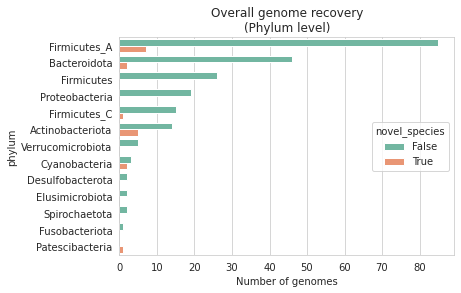

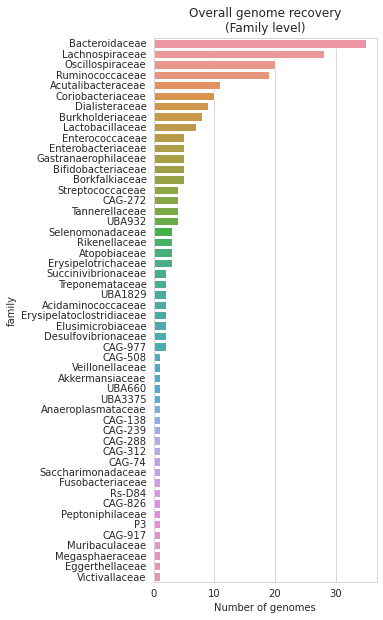

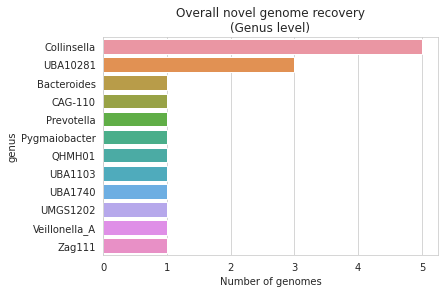

In [193]:
print(f"In total we recovered {len(IMdb)} genomes. {len(IMdb[IMdb['pass_filters'] == True])} passed basic filters. Together these form {len(IMdb['v1_cluster'].unique()) - 1} species")

Fdb = IMdb[IMdb['v1_rep'] == True]
Fdb['species'] = [x.split(';')[-1][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['phylum'] = [x.split(';')[1][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['genus'] = [x.split(';')[-2][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['family'] = [x.split(';')[-3][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['novel_species'] = [x == '' for x in Fdb['species']]

print(f"{len(Fdb[Fdb['sample_type'] == 'enrichment'])} species came from enrichment samples; the rest from fecal samples")

fdb = Fdb[~Fdb['classification'].isna()].groupby(['phylum', 'novel_species'])['genome'].agg('count').to_frame().reset_index()
fdb['genome'] = fdb['genome'].astype(int)
fdb = fdb.sort_values('genome', ascending=False)
sns.barplot(data=fdb, y='phylum', x='genome', hue='novel_species')
plt.xlabel("Number of genomes")
plt.title("Overall genome recovery\n(Phylum level)")
plt.gcf().savefig(fig_loc + 'genomeRecovery_1.png', bbox_inches='tight', dpi=300)
plt.show()

fdb = Fdb[~Fdb['classification'].isna()].groupby(['family'])['genome'].agg('count').to_frame().reset_index()
fdb['genome'] = fdb['genome'].astype(int)
fdb = fdb.sort_values('genome', ascending=False)
sns.barplot(data=fdb, y='family', x='genome')
plt.xlabel("Number of genomes")
plt.gcf().set_size_inches(4, 10)
plt.title("Overall genome recovery\n(Family level)")
plt.gcf().savefig(fig_loc + 'genomeRecovery_2.png', bbox_inches='tight', dpi=300)
plt.show()

fdb = Fdb[(~Fdb['classification'].isna()) & (Fdb['novel_species'] == True)].groupby(['genus'])['genome'].agg('count').to_frame().reset_index()
fdb['genome'] = fdb['genome'].astype(int)
fdb = fdb.sort_values('genome', ascending=False)
sns.barplot(data=fdb, y='genus', x='genome')
plt.xlabel("Number of genomes")
plt.title("Overall novel genome recovery\n(Genus level)")
plt.gcf().savefig(fig_loc + 'genomeRecovery_3.png', bbox_inches='tight', dpi=300)
plt.show()



## Create IM_genomeSetAlpha

In [194]:
# Load the Cdb
AACdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v2/drep_output/data_tables/Cdb.csv',
                            sep=',')

In [195]:
Udb = pd.read_csv('/LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/genomes-nr_metadata.tsv', sep='\t')
Udb.head()

Genome Original_name Study_set Genome_type   Length  N_contigs  \
0  GUT_GENOME000001    11861_6_55       HBC     Isolate  3219614        137   
1  GUT_GENOME000002    11861_6_56       HBC     Isolate  3295906         82   
2  GUT_GENOME000003    11861_6_57       HBC     Isolate  4193964        120   
3  GUT_GENOME000004    11861_6_58       HBC     Isolate  4433090        100   
4  GUT_GENOME000005    11861_6_59       HBC     Isolate  3011630         45   

      N50  GC_content  Completeness  Contamination  CMseq  rRNA_5S  rRNA_16S  \
0   47258       28.26         98.59           0.70    NaN    88.24     99.74   
1   96078       38.19         99.33           1.34    NaN    83.19     98.76   
2   81111       41.36         98.52           0.00    NaN     0.00     90.41   
3  109266       42.60         99.37           0.00    NaN    82.35     95.37   
4  172321       40.46         99.12           0.58    NaN     0.00     99.67   

   rRNA_23S  tRNAs Genome_accession       Species_rep MGnify_accession  \
0     99.83     20              NaN  GUT_GENOME000001  MGYG-HGUT-00001   
1     99.83     20              NaN  GUT_GENOME001689  MGYG-HGUT-00262   
2     77.81     20              NaN  GUT_GENOME096067  MGYG-HGUT-01338   
3     86.19     19              NaN  GUT_GENOME000004  MGYG-HGUT-00002   
4     99.62     20              NaN  GUT_GENOME001575  MGYG-HGUT-00249   

                                                                                                                   Lineage  \
0          d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Peptostreptococcaceae;g__GCA-900066495;s__   
1  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eubacterium_E;s__Eubacterium_E hallii   
2        d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A;s__Blautia_A wexlerae   
3     d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A;s__Blautia_A sp900066165   
4  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Faecalicatena;s__Faecalicatena faecis   

  Sample_accession Study_accession         Country Continent  \
0        ERS370061       ERP105624  United Kingdom    Europe   
1        ERS370062       ERP105624  United Kingdom    Europe   
2        ERS370063       ERP105624  United Kingdom    Europe   
3        ERS370064       ERP105624  United Kingdom    Europe   
4        ERS370065       ERP105624  United Kingdom    Europe   

                                                                                                                                              FTP_download  
0  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-000/MGYG-HGUT-00001/genomes1/GUT_GENOME000001.gff.gz  
1  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-002/MGYG-HGUT-00262/genomes1/GUT_GENOME000002.gff.gz  
2  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-013/MGYG-HGUT-01338/genomes3/GUT_GENOME000003.gff.gz  
3  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-000/MGYG-HGUT-00002/genomes1/GUT_GENOME000004.gff.gz  
4  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-002/MGYG-HGUT-00249/genomes1/GUT_GENOME000005.gff.gz

In [210]:
ACdb = AACdb[['genome', 'secondary_cluster']]

# Create info sheet, stating with UHGG
db1 = Udb.copy()
db1['genome'] = db1['Genome'] + '.fna.fa'
db1['mac_loc'] = ['/LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/' + x for x in db1['genome']]
db1 = db1.rename(columns={'Lineage':'classification'})
db1['source'] = 'UHGG'
db1['score'] = 0
db1 = db1[['genome', 'classification', 'score', 'source', 'mac_loc']]

# Create IMdb info sheet
db2 = IMdb[IMdb['v1_rep'] == True]
db2['source'] = 'IM'
db2 = db2[['genome', 'classification', 'score', 'source', 'mac_loc']]

Idb = pd.concat([db1, db2]).reset_index(drop=True)

# Add info
ACdb = pd.merge(ACdb, Idb, how='left')

# Call v2 reps
ACdb = ACdb.rename(columns={'secondary_cluster':'v2_cluster'})
REPS = set(ACdb.sort_values('score', ascending=False).drop_duplicates(subset=['v2_cluster'])['genome'])
ACdb['v2_rep'] = [x in REPS for x in ACdb['genome']]
ACdb


genome v2_cluster  \
0     GUT_GENOME013238.fna.fa        1_0   
1     GUT_GENOME057850.fna.fa        2_0   
2     GUT_GENOME157195.fna.fa        3_0   
3     GUT_GENOME238203.fna.fa        4_0   
4     GUT_GENOME243020.fna.fa        5_0   
...                       ...        ...   
4885  GUT_GENOME263866.fna.fa     3292_2   
4886  GUT_GENOME284871.fna.fa     3293_0   
4887  GUT_GENOME096401.fna.fa     3294_0   
4888  GUT_GENOME111314.fna.fa     3295_0   
4889  GUT_GENOME237836.fna.fa     3296_0   

                                                                                                                       classification  \
0                                               d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__;s__   
1                                               d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__;s__   
2                                              d__Bacteria;p__Myxococcota;c__Bradimonadia;o__Bradymonadales;f__UBA4248;g__UBA4248;s__   
3                                        d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA1732;s__   
4                     d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella amnii   
...                                                                                                                               ...   
4885  d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Faecalicoccus;s__Faecalicoccus pleomorphus   
4886                           d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Faecalicoccus;s__   
4887   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Faecalitalea;s__Faecalitalea cylindroides   
4888                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Christensenellales;f__Christensenellaceae;g__;s__   
4889          d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanocorpusculaceae;g__Methanocorpusculum;s__   

      score source  \
0       0.0   UHGG   
1       0.0   UHGG   
2       0.0   UHGG   
3       0.0   UHGG   
4       0.0   UHGG   
...     ...    ...   
4885    0.0   UHGG   
4886    0.0   UHGG   
4887    0.0   UHGG   
4888    0.0   UHGG   
4889    0.0   UHGG   

                                                                             mac_loc  \
0     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME013238.fna.fa   
1     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME057850.fna.fa   
2     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME157195.fna.fa   
3     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME238203.fna.fa   
4     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME243020.fna.fa   
...                                                                              ...   
4885  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME263866.fna.fa   
4886  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME284871.fna.fa   
4887  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME096401.fna.fa   
4888  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME111314.fna.fa   
4889  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME237836.fna.fa   

      v2_rep  
0       True  
1       True  
2       True  
3       True  
4       True  
...      ...  
4885    True  
4886    True  
4887    True  
4888    True  
4889    True  

[4890 rows x 7 columns]

## Print the final stuff

In [217]:
# Find genomes that aren't in UHGG
unique_clusters = []
for c, db in ACdb.groupby('v2_cluster'):
    if 'UHGG' not in set(db['source']):
        unique_clusters.append(c)
print(len(unique_clusters))

ACdb[ACdb['v2_cluster'].isin(unique_clusters)]

20


genome  \
106   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_27.10.fa   
431    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_16.4.fa   
881      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS14_B.2.fa   
1029   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_2.21.fa   
1228   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.3.fa   
1356   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_33.8.fa   
1357   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_5.27.fa   
1358  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_15.17.fa   
2018   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.19.fa   
2056      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__RS5_A.4.fa   
2288     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.10.fa   
2583    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS12_A.12.fa   
2738  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.28.fa   
2739    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_2.1.fa   
2740    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.3.fa   
2741   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_12.7.fa   
2742  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_48.20.fa   
2897    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.1.fa   
3489  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_40.15.fa   
4284    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.6.fa   

     v2_cluster  \
106        82_2   
431       340_2   
881       689_0   
1029      791_2   
1228     856_95   
1356    856_190   
1357    856_191   
1358    856_192   
2018     1112_5   
2056     1142_2   
2288     1312_2   
2583     1513_2   
2738     1620_4   
2739     1620_5   
2740     1620_6   
2741     1620_7   
2742     1620_8   
2897     1714_2   
3489     2209_2   
4284     2822_3   

                                                                                                                            classification  \
106                              d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-977;g__UBA2903;s__UBA2903 sp900768465   
431                  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900551275   
881                                       d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__   
1029          d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Eggerthellaceae;g__CAAEEV01;s__CAAEEV01 sp900754955   
1228                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1356                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1357                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1358                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
2018   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium;s__Faecalibacterium prausnitzii   
2056                                  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Pygmaiobacter;s__   
2288                                      d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UMGS1202;s__   
2583  d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrob

## Export

In [225]:
for i, row in ACdb[ACdb['v2_rep'] == True].iterrows():
    cmd = f"cp {row['mac_loc']} /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/IM_genomeSetAlpha/indvidual_genomes/"
    subprocess.call(cmd, shell=True)

## Save

In [226]:
ACdb.to_csv(data_loc + 'IM_genomeSetAlpha_v1.csv', index=False)


In [247]:
set(Wdb['genome']) - set(Rdb['genome'])

{'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_2.8.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.12.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.11.fa'}

In [241]:
ACdb[ACdb['classification'].isna()]

genome  \
355     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa   
403     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_2.8.fa   
414    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.12.fa   
972    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa   
1135   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   
2357  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa   
2360  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa   
4510     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.11.fa   

     v2_cluster classification      score source  \
355       283_1            NaN  91.295204     IM   
403       325_1            NaN  83.818251     IM   
414       333_1            NaN  83.980552     IM   
972       755_1            NaN  93.243360     IM   
1135     856_13            NaN  81.306335     IM   
2357     1362_2            NaN  97.418735     IM   
2360     1363_1            NaN  71.981569     IM   
4510     2993_1            NaN  86.665467     IM   

                                                                                                                                                                                                 mac_loc  \
355     /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa   
403     /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_2.8.fa   
414    /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.12.fa   
972    /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa   
1135   /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   
2357  /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa   
2360  /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa   
4510     /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.11.fa   

      v2_rep  
355     True  
403     True  
414     True  
972     True  
1135    True  
2357    True  
2360    True  
4510    True

In [244]:
Rdb[Rdb['genome'] == 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa']

Empty DataFrame
Columns: [user_genome, classification, fastani_reference, fastani_reference_radius, fastani_taxonomy, fastani_ani, fastani_af, closest_placement_reference, closest_placement_radius, closest_placement_taxonomy, closest_placement_ani, closest_placement_af, pplacer_taxonomy, classification_method, msa_percent, translation_table, red_value, genome]
Index: []

In [245]:
Rdb

user_genome  \
0     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.3   
1    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_11.10   
2    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.14   
3    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.20   
4    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.25   
..                                                                           ...   
233     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.10   
234      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.4   
235      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.5   
236      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.6   
237      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.6   

                                                                                                                                                  classification  \
0                                                  d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1                                                     d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp900550165   
2                                        d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__Borkfalkiaceae;g__UBA10281;s__UBA10281 sp900767885   
3    d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__Phascolarctobacterium_A succinatutens   
4                                          d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900767615   
..                                                                                                                                                           ...   
233                                                             d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UMGS1202;s__   
234                              d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Tannerellaceae;g__Parabacteroides;s__Parabacteroides sp900541965   
235                                       d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides fragilis_A   
236                                 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides thetaiotaomicron   
237                                              d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__SFJ001;s__SFJ001 sp004555865   

    fastani_reference  fastani_reference_radius  \
0                 NaN                       NaN   
1     GCA_900550165.1                      95.0   
2     GCF_900767885.1                      95.0   
3     GCF_000188175.1                      95.0   
4     GCA_900767615.1                      95.0   
..                ...                       ...   
233               NaN                       NaN   
234   GCA_900541965.1                      95.0   
235   GCF_002849695.1                      95.0   
236   GCF_000011065.1                      95.0   
237   GCA_004555865.1                      95.0   

                                                                                                                                                fastani_taxonomy  \
0                                                                                                                                                            NaN   
1                                                     d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 s